In [2]:
from os import listdir
from os.path import isdir, join
from scipy import misc
import matplotlib.pyplot as plt
import random
import numpy as np
from skimage.color import rgb2gray
from skimage import filters
%matplotlib inline

path = "../input/stage1_train/"
directories = [path + f for f in listdir(path) if isdir(path + f)]

count_masks = []
count_images = len(directories)
training_examples = []

for train_example_dir in directories:
    path_to_images = train_example_dir + "/images/"
    path_to_masks = train_example_dir + "/masks/"
    path_image = [path_to_images + f for f in listdir(path_to_images)][0]
    path_masks = [path_to_masks + f for f in listdir(path_to_masks)]
    training_examples.append({"path_image": path_image, "path_masks": path_masks})
    count_masks.append(len(path_masks))


minimum_masks = min(count_masks)
maximum_masks = max(count_masks)
count_images =  len(count_masks)
count_all_masks = sum(count_masks)

print "Number of images: ", count_images
print "Number of total cells: ", count_all_masks
print "Average of cells per image: ", count_all_masks*1.0/count_images
print "Minimum number of cells per image: ", minimum_masks
print "Maximum number of cells per image:", maximum_masks
             


Number of images:  670
Number of total cells:  29461
Average of cells per image:  43.971641791
Minimum number of cells per image:  1
Maximum number of cells per image: 375


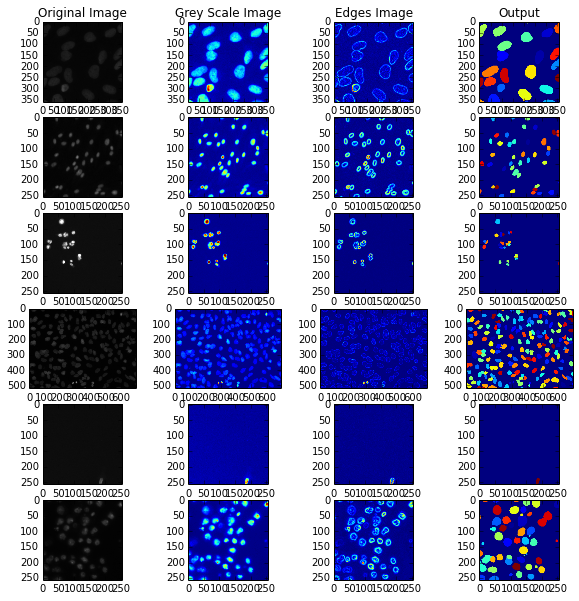

In [34]:
number_plots_lines = 6
number_plots_column = 4
image_size = 10

fig, ax = plt.subplots(nrows=number_plots_lines,ncols=number_plots_column, figsize=(image_size,image_size))

# Choose the images random to plot
images_to_plot = random.sample(range(0, count_images), number_plots_column*number_plots_lines)
ax[0][0].set_title("Original Image")
ax[0][1].set_title("Grey Scale Image")
ax[0][2].set_title("Edges Image")
ax[0][3].set_title("Output")

for i in range(number_plots_lines):
    
    j=0
    
    training_example = images_to_plot[i]
    
    # Get image and masks
    path_image = training_examples[training_example]["path_image"]
    path_masks = training_examples[training_example]["path_masks"]
        
    # plot an image
    image = misc.imread(path_image)
    ax[i][j].imshow(image)
    imgplot = plt.imshow(image) 
        
    # Covert image to grey-scale
    img_gray = rgb2gray(image)
    ax[i][j+1].imshow(img_gray)
    
    # Find the Images Edges
    edges = filters.sobel(img_gray)
    ax[i][j+2].imshow(edges)

    # Merge masks into one image
    height, width, _ = image.shape        
    num_masks = len(path_masks)
    labels = np.zeros((height, width), image.dtype)
        
    for index in range(0, num_masks):
        path_mask = path_masks[index]
        image_masks = misc.imread(path_mask)
        pixeis_cell = np.where(image_masks!=0)
        
        labels[pixeis_cell] = index + 1
    ax[i][j+3].imshow(labels)



In [ ]:
max_cells = []
max_not_cells = []
for i in range(count_images):
    
    # Get image and masks
    path_image = training_examples[i]["path_image"]
    path_masks = training_examples[i]["path_masks"]
    
    image = misc.imread(path_image)

    # Covert image to grey-scale
    img_gray = rgb2gray(image)

    # Merge masks into one image
    height, width, _ = image.shape        
    num_masks = len(path_masks)
    labels = np.zeros((height, width), image.dtype)
        
    for index in range(0, num_masks):
        path_mask = path_masks[index]
        image_masks = misc.imread(path_mask)
        pixeis_cell = np.where(image_masks!=0)
        labels[pixeis_cell] = index + 1
        
    pixeis_cell = np.where(labels!=0)
    pixeis_not_cell = np.where(labels==0)
        
    max_cells.append(img_gray[pixeis_cell].max())
    max_not_cells.append(img_gray[pixeis_not_cell].max())

number_bins=50
width=10
height=5

plt.figure(num=None, figsize=(width, height), dpi=80, facecolor='w', edgecolor='k')
plt.hist(max_cells, label='cells', alpha=0.3, bins=number_bins)
plt.hist(max_not_cells, label='not cells', alpha=0.3, bins=number_bins)
plt.legend(loc='upper right')
plt.title('Distribution maximum at grey scale')